In [1]:
import itertools

import numpy as np
import scipy as sci

import ambulance_game as abg

In [2]:
lambda_1 = 1
lambda_2 = 2
mu = 2
num_of_servers = 2
threshold = 3
system_capacity = 4
buffer_capacity = 2

In [3]:
Q = abg.markov.get_transition_matrix(
    lambda_1=lambda_1,
    lambda_2=lambda_2,
    mu=mu,
    num_of_servers=num_of_servers,
    threshold=threshold,
    system_capacity=system_capacity,
    buffer_capacity=buffer_capacity
)

## Using numerical integration - odeint

In [5]:
pi_1 = abg.markov.get_steady_state_numerically(
    Q, integration_function=sci.integrate.odeint
)
pi_1

array([0.17596013, 0.2639402 , 0.19795515, 0.14846636, 0.08660538,
       0.05464387, 0.02474439, 0.02268236, 0.02500215])

## Using numerical integration - solve_ivp

In [6]:
pi_2 = abg.markov.get_steady_state_numerically(
    Q, integration_function=sci.integrate.solve_ivp
)
pi_2

array([0.17596012, 0.26394019, 0.19795515, 0.14846637, 0.08660539,
       0.05464388, 0.02474439, 0.02268236, 0.02500215])

## Using linear algebra - solve

In [8]:
pi_3 = abg.markov.get_steady_state_algebraically(
    Q, algebraic_function=np.linalg.solve
)
pi_3

array([0.17596013, 0.2639402 , 0.19795515, 0.14846636, 0.08660538,
       0.05464387, 0.02474439, 0.02268236, 0.02500215])

## Using linear algebra - lstsq

In [9]:
pi_4 = abg.markov.get_steady_state_algebraically(
    Q, algebraic_function=np.linalg.lstsq
)
pi_4

array([0.17596013, 0.2639402 , 0.19795515, 0.14846636, 0.08660538,
       0.05464387, 0.02474439, 0.02268236, 0.02500215])

In [27]:
for arr_i, arr_j in tuple(itertools.combinations((pi_1, pi_2, pi_3, pi_4), 2)):
    assert np.allclose(arr_i, arr_j)

In [38]:
import itertools

import matplotlib.pyplot as plt

In [39]:
all_states = abg.markov.build_states(
    threshold=threshold, system_capacity=system_capacity, buffer_capacity=buffer_capacity
)

In [40]:
all_states

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (0, 4), (1, 4), (2, 4)]

In [55]:
demo = np.zeros((buffer_capacity + 1, system_capacity + 1))
for index, (u, v) in enumerate(all_states):
    demo[u, v] = pi_3[index] - pi_4[index]

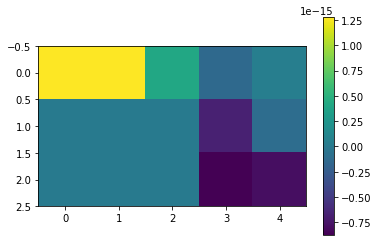

In [56]:
plt.imshow(demo)
plt.colorbar()